# Clustering of students exam performance

## Import packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder,RobustScaler, StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2, RFECV
from sklearn.decomposition import PCA
import plotly.express as px
import plotly.figure_factory as ff
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.neighbors import LocalOutlierFactor
from scipy.cluster.hierarchy import linkage, dendrogram
from mpl_toolkits.mplot3d import axes3d
from sklearn.metrics import silhouette_score, calinski_harabasz_score, adjusted_rand_score
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

## Reading data

In [2]:
df = pd.read_csv('./data/StudentsPerformance.csv')

## Data preprocessing and analysis

In [3]:
df.head()

gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75

In [4]:
df.shape

(1000, 8)

### Dataset information

The dataset contains data for 1000 students that describe their background and results on various types fo tests. 
Each student is described by 8 attributes:
- Gender
- Race/Ethnicity
- Parental level of education
- Lunch
- Test preparation course
- Math score
- Reading score
- Writing score

The race/ethnicity of the students is divided into 5 groups (A, B, C, D, E). Parental level of education represents the highest level of education achieved by the students parents. Test preparation course colum describes wheather or not a student has completed a preparation course before attempting the tests. Last 3 colums describe the test results in various fields (math, reading and writing).

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [7]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

### Checking for missing values 

In [8]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### Looking for duplicates

In [9]:
dups = df.duplicated()
df[dups]

Empty DataFrame
Columns: [gender, race/ethnicity, parental level of education, lunch, test preparation course, math score, reading score, writing score]
Index: []

In [10]:
df.head(15)

gender race/ethnicity parental level of education         lunch  \
0   female        group B           bachelor's degree      standard   
1   female        group C                some college      standard   
2   female        group B             master's degree      standard   
3     male        group A          associate's degree  free/reduced   
4     male        group C                some college      standard   
5   female        group B          associate's degree      standard   
6   female        group B                some college      standard   
7     male        group B                some college  free/reduced   
8     male        group D                 high school  free/reduced   
9   female        group B                 high school  free/reduced   
10    male        group C          associate's degree      standard   
11    male        group D          associate's degree      standard   
12  female        group B                 high school      standard   
13    male        group A                some college      standard   
14  female        group A             master's degree      standard   

   test preparation course  math score  reading score  writing score  
0                     none          72             72             74  
1                completed          69             90             88  
2                     none          90             95             93  
3                     none          47             57             44  
4                     none          76             78             75  
5                     none          71             83             78  
6                completed          88             95             92  
7                     none          40             43             39  
8                completed          64             64             67  
9                     none          38             60             50  
10                    none          58             54             52  
11                    none          40             52             43  
12                    none          65             81             73  
13               completed          78             72             70  
14                    none          50             53             58

Median values

In [11]:
df.median(numeric_only=True)

math score       66.0
reading score    70.0
writing score    69.0
dtype: float64

Mean values

In [12]:
df.mean(numeric_only=True)

math score       66.089
reading score    69.169
writing score    68.054
dtype: float64

In [13]:
df.mode()

gender race/ethnicity parental level of education     lunch  \
0  female        group C                some college  standard   

  test preparation course  math score  reading score  writing score  
0                    none          65             72             74

In [14]:
df.describe().T

count    mean        std   min    25%   50%   75%    max
math score     1000.0  66.089  15.163080   0.0  57.00  66.0  77.0  100.0
reading score  1000.0  69.169  14.600192  17.0  59.00  70.0  79.0  100.0
writing score  1000.0  68.054  15.195657  10.0  57.75  69.0  79.0  100.0

### Data Visualizations

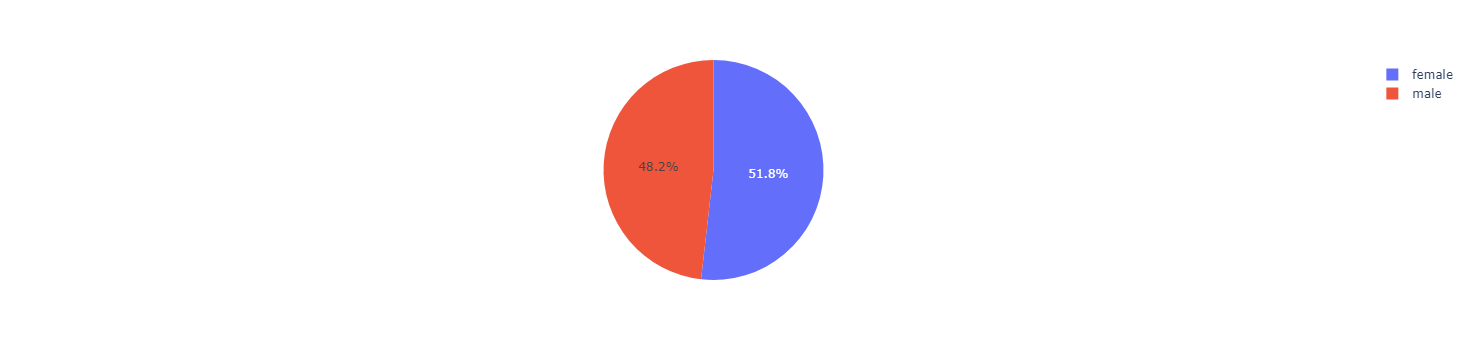

In [15]:
fig_gender = px.pie(df, values = df['gender'].value_counts().values, names = df['gender'].value_counts().index)
fig_gender.show()

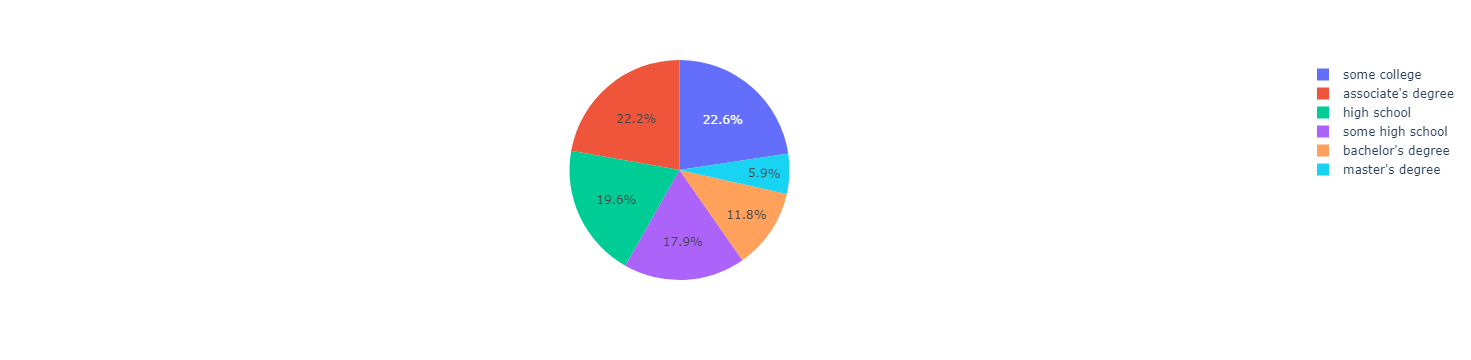

In [16]:
fig_parental_education_level = px.pie(df, values = df['parental level of education'].value_counts().values, names = df['parental level of education'].value_counts().index)
fig_parental_education_level.show()

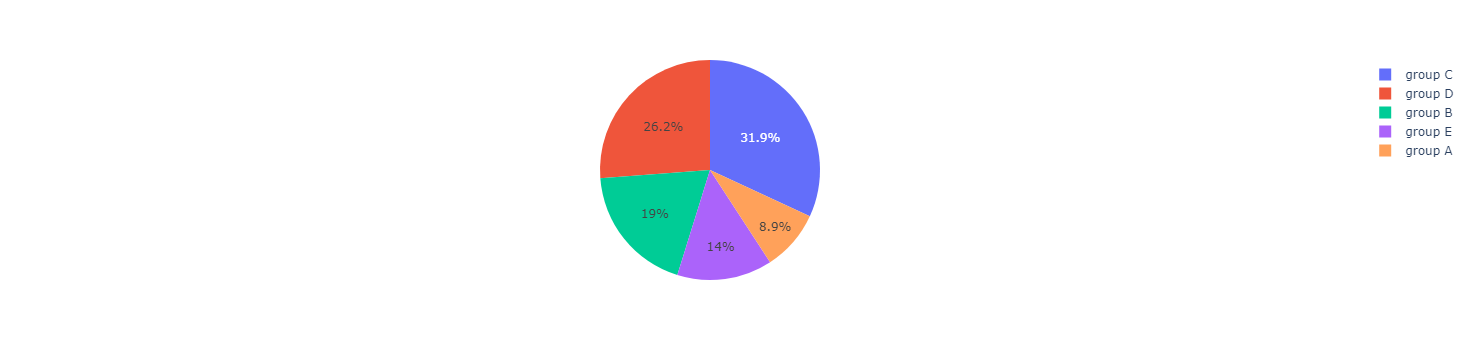

In [17]:
fig_race_ethnicity = px.pie(df, values = df['race/ethnicity'].value_counts().values, names = df['race/ethnicity'].value_counts().index)
fig_race_ethnicity.show()

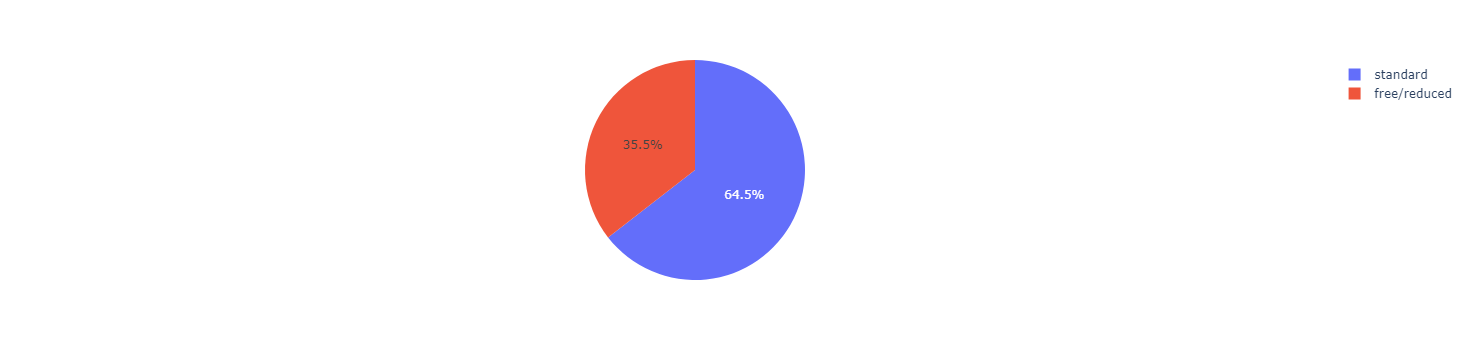

In [18]:
fig_lunch = px.pie(df, values = df['lunch'].value_counts().values, names = df['lunch'].value_counts().index)
fig_lunch.show()

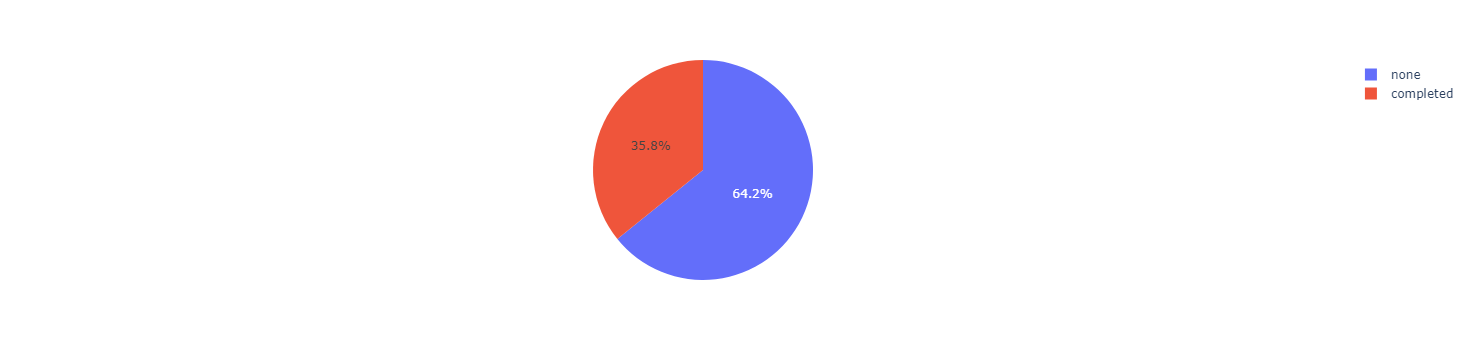

In [19]:
fig_test_prep_scores = px.pie(df, values = df['test preparation course'].value_counts().values, names = df['test preparation course'].value_counts().index)
fig_test_prep_scores.show()

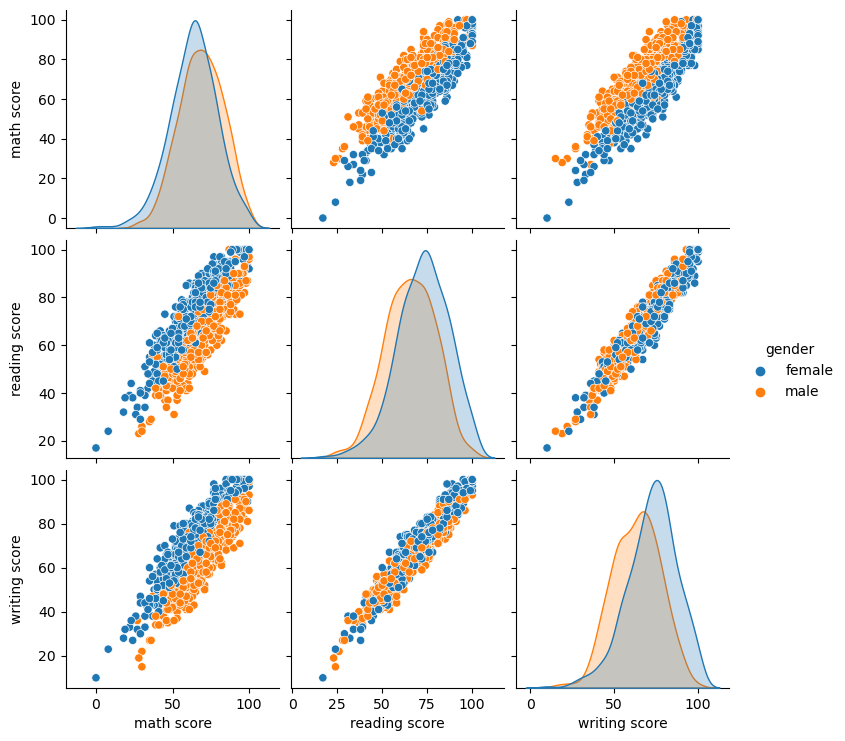

In [20]:
sns.pairplot(df[['gender','math score','reading score','writing score']],hue='gender')

<AxesSubplot: xlabel='math score', ylabel='reading score'>

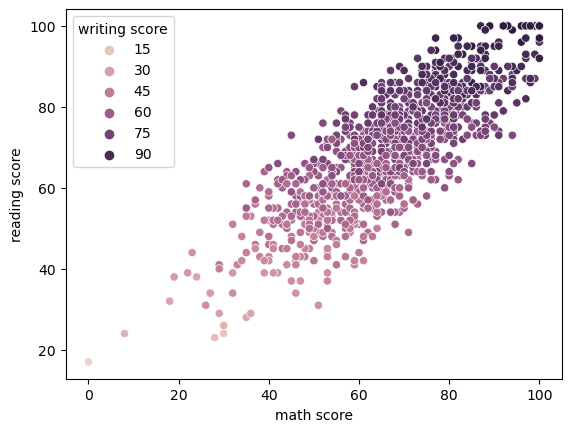

In [21]:
sns.scatterplot(x = df['math score'], y = df['reading score'], hue = df['writing score'])

Boxplot

Text(0.5, 1.0, 'Writing')

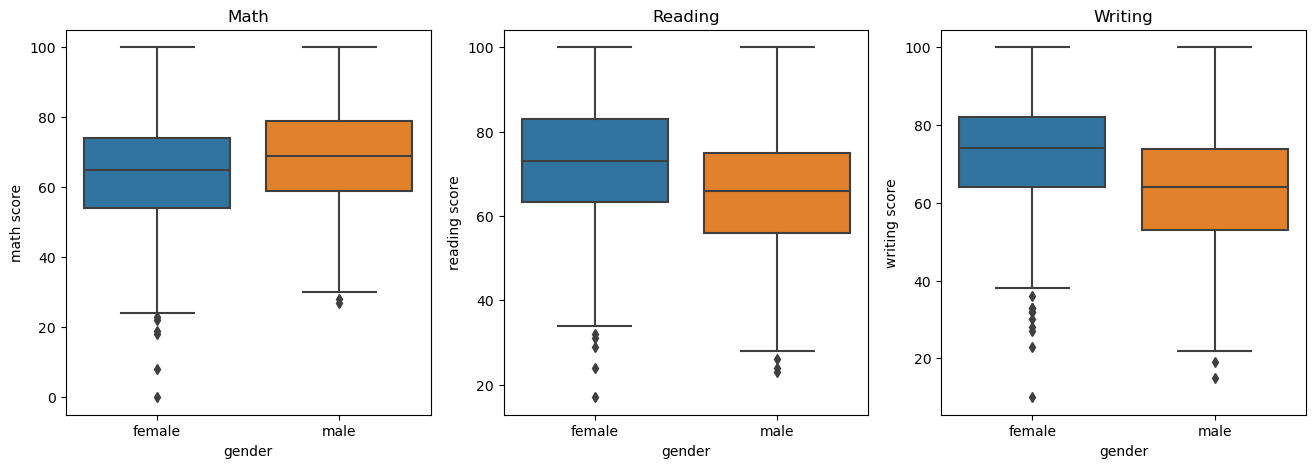

In [22]:
plt.figure(figsize=(16,5))
plt.subplot(1, 3,1)
sns.boxplot(x="gender", y="math score", data=df).set_title('Math')
plt.subplot(1, 3,2)
sns.boxplot(x="gender", y="reading score", data=df).set_title('Reading')
plt.subplot(1, 3,3)
sns.boxplot(x="gender", y="writing score", data=df).set_title('Writing')

Histogram

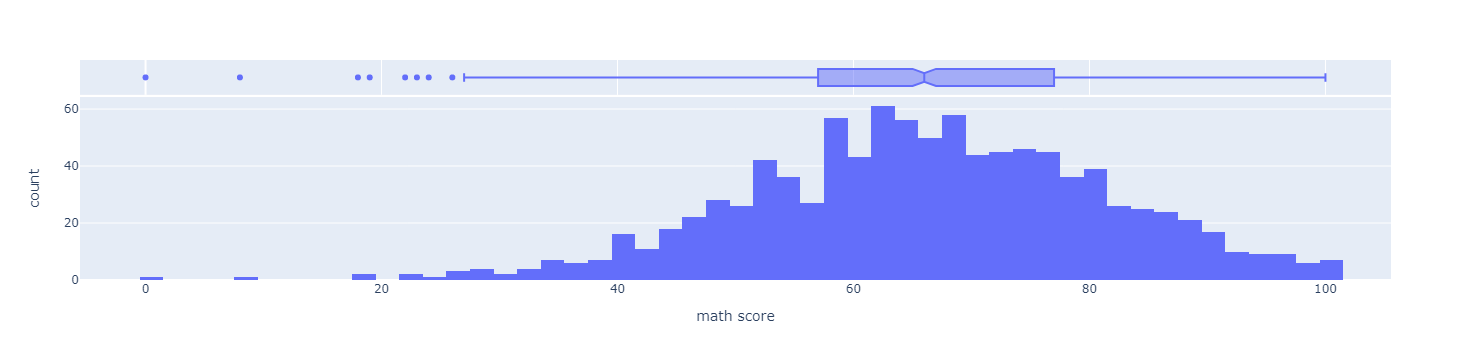

In [23]:
fig_math_hist = px.histogram(df, x="math score", marginal = 'box')
fig_math_hist.show()

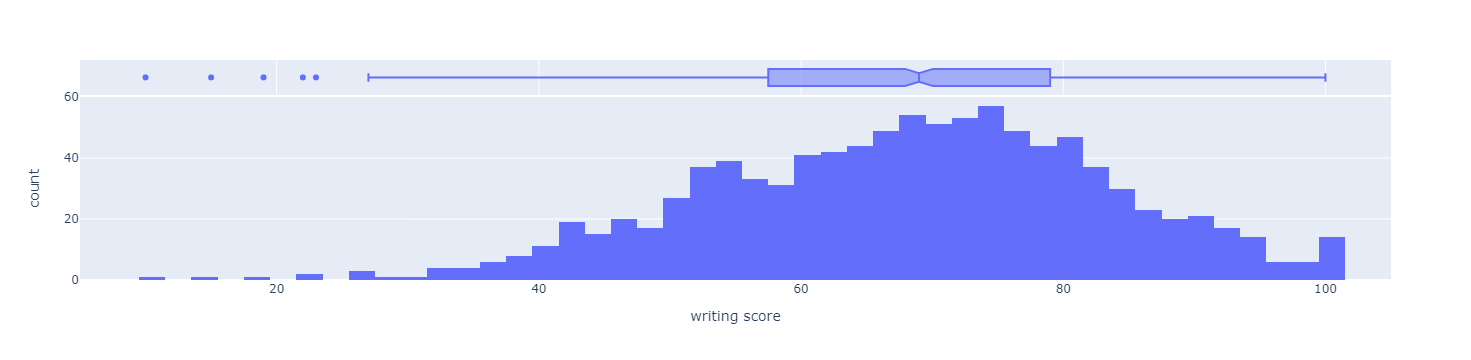

In [24]:
fig_writing_hist = px.histogram(df, x="writing score", marginal = 'box')
fig_writing_hist.show()

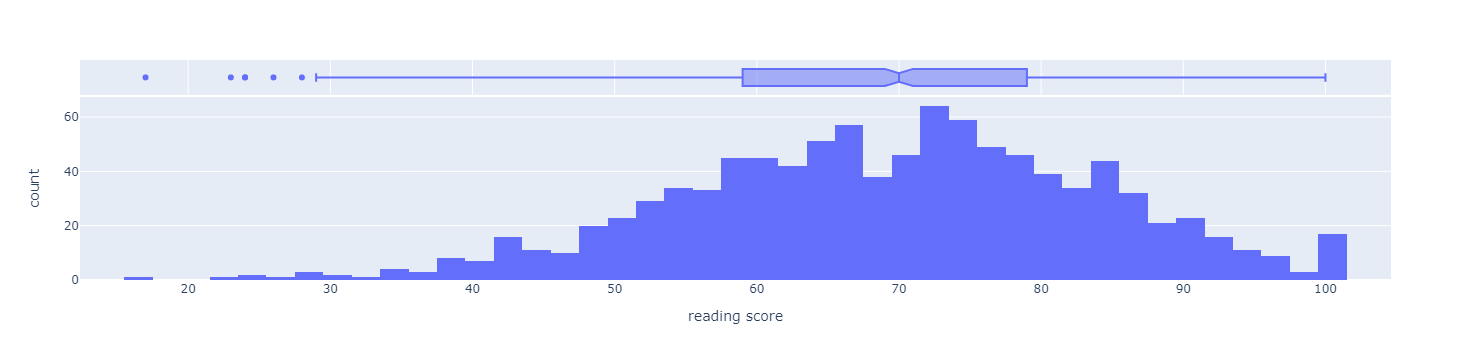

In [25]:
fig_reading_hist = px.histogram(df, x="reading score", marginal = 'box')
fig_reading_hist.show()

Overlapping the test scores

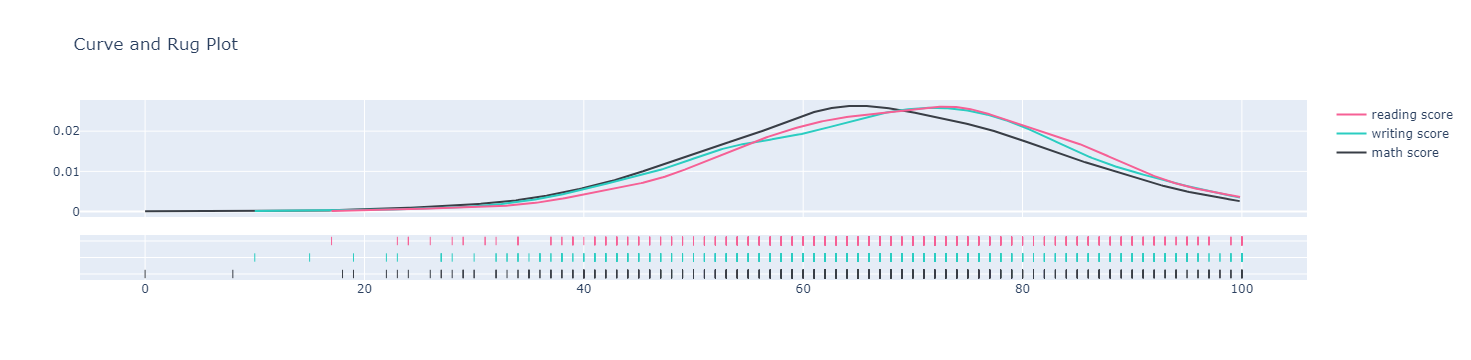

In [26]:
score_labels = ['math score', 'writing score', 'reading score']

colors = ['#393E46', '#2BCDC1', '#F66095']

fig_dist_plot_overlapped = ff.create_distplot([df[c] for c in df[score_labels]], score_labels, show_hist=False, colors=colors)

fig_dist_plot_overlapped.update_layout(title_text='Curve and Rug Plot')
fig_dist_plot_overlapped.show()

Adding average data

In [27]:
#df['average score']=(df['math score']
#                +df['reading score']+df['writing score'])//3

In [28]:
#df['average score'].value_counts()
df.head()

gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75

### Corelations

Merging 'some high school' with 'high school' and renaming 'some college' to 'college' from parental level of education column

In [29]:
df = df.replace({'parental level of education': {'some high school': 'high school'}})
df = df.replace({'parental level of education': {'some college': 'college'}})
df = df.replace({"race/ethnicity": {'group A': 'A', 'group B': 'B', 'group C': 'C', 'group D': 'D', 'group E': 'E'}})

In [30]:
df['sum'] = df['math score'] + df['reading score'] + df['writing score']

In [31]:
df.head(10)

gender race/ethnicity parental level of education         lunch  \
0  female              B           bachelor's degree      standard   
1  female              C                     college      standard   
2  female              B             master's degree      standard   
3    male              A          associate's degree  free/reduced   
4    male              C                     college      standard   
5  female              B          associate's degree      standard   
6  female              B                     college      standard   
7    male              B                     college  free/reduced   
8    male              D                 high school  free/reduced   
9  female              B                 high school  free/reduced   

  test preparation course  math score  reading score  writing score  sum  
0                    none          72             72             74  218  
1               completed          69             90             88  247  
2                    none          90             95             93  278  
3                    none          47             57             44  148  
4                    none          76             78             75  229  
5                    none          71             83             78  232  
6               completed          88             95             92  275  
7                    none          40             43             39  122  
8               completed          64             64             67  195  
9                    none          38             60             50  148

Parent education level in corelation to test scores

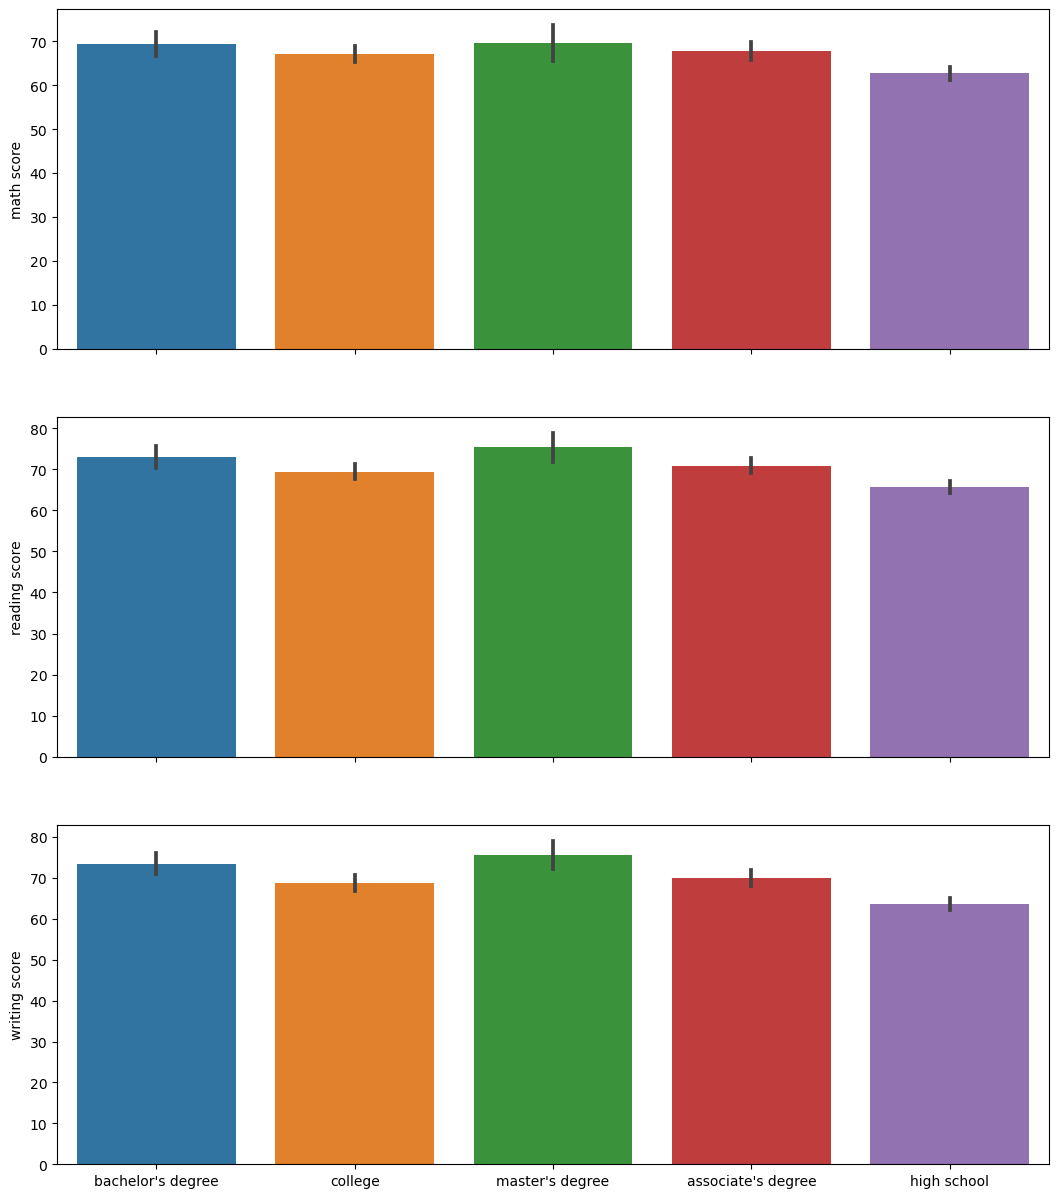

In [32]:
education_level_list = df["parental level of education"].unique()
df_mean = pd.Series()
fig2 , ax = plt.subplots(3, 1, figsize = [12.8, 15], sharex= True)

# Create neat table for mean values
for i, education_level in enumerate(education_level_list):
    mean = df[df["parental level of education"] == education_level].mean()
    mean = mean.rename(education_level)
    df_mean = pd.concat([df_mean, mean], axis = 1, sort = False)

df_mean = df_mean.drop(df_mean.columns[0], axis = 1)

# Plot the exam score based on parental education
ax[0] = sns.barplot(x = "parental level of education", y = "math score", 
                    data = df, estimator = np.mean, ax = ax[0])
ax[1] = sns.barplot(x = "parental level of education", y = "reading score", 
                    data = df, estimator = np.mean, ax = ax[1])
ax[2] = sns.barplot(x = "parental level of education", y = "writing score", 
                    data = df, estimator = np.mean, ax = ax[2])
for axes in ax:
    axes.set_xlabel("")

Heatmap

bachelor's degree     college  master's degree  \
math score             69.389831   67.128319        69.745763   
reading score          73.000000   69.460177        75.372881   
writing score          73.381356   68.840708        75.677966   
sum                   215.771186  205.429204       220.796610   

               associate's degree  high school  
math score              67.882883    62.786667  
reading score           70.927928    65.770667  
writing score           69.896396    63.613333  
sum                    208.707207   192.170667

<AxesSubplot: >

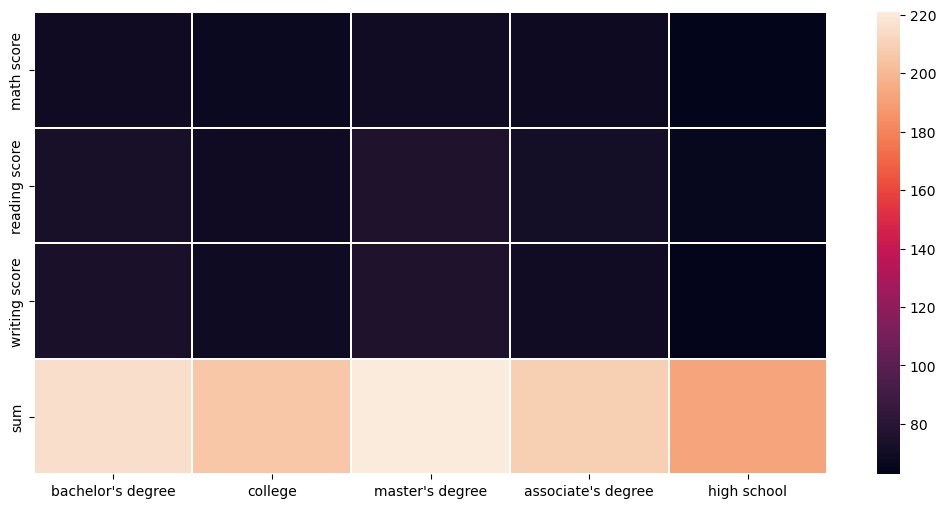

In [33]:
display(df_mean)

fig, ax = plt.subplots(figsize=(12.8, 6))
sns.heatmap(df_mean,linewidths=.1, ax=ax)

Lunch type in corelation to test scores

math score  reading score  writing score
lunch                                                 
free/reduced   58.921127      64.653521      63.022535
standard       70.034109      71.654264      70.823256

<AxesSubplot: ylabel='lunch'>

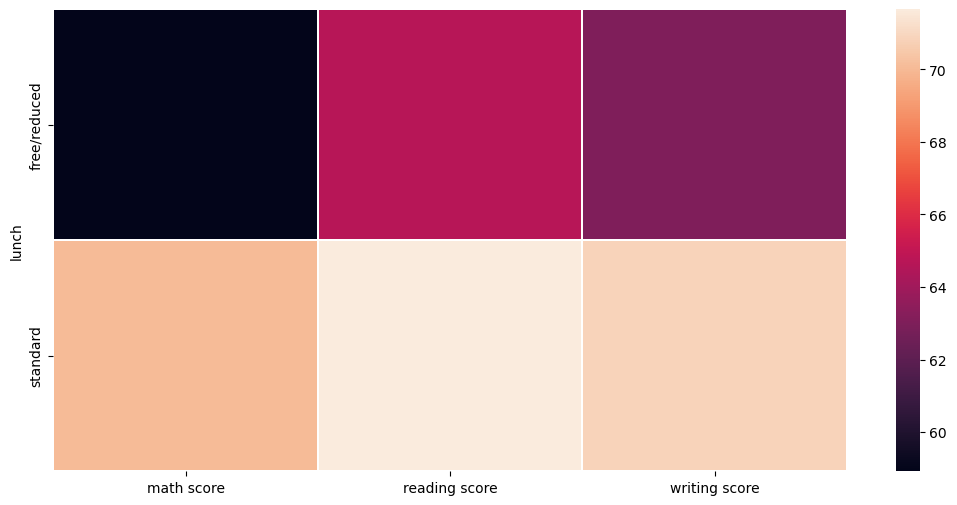

In [34]:
dataset_lunch = df[["lunch", "math score", "reading score", "writing score"]].copy()
dataset_lunch = dataset_lunch.groupby(by = ["lunch"]).mean()

display(dataset_lunch)
fig, ax = plt.subplots(figsize=(12.8, 6))
sns.heatmap(dataset_lunch,linewidths=.1, ax=ax)

Preparation test completed in corelation to test scores

In [35]:
dataset_preparation = df[["test preparation course", "math score", "reading score", "writing score"]].copy()
dataset_preparation = df.groupby(by = ["test preparation course"]).mean()
display(dataset_preparation)

math score  reading score  writing score         sum
test preparation course                                                      
completed                 69.695531      73.893855      74.418994  218.008380
none                      64.077882      66.534268      64.504673  195.116822

### Encode non-numerical data

In [36]:
df_non_encoded = df.copy()

In [37]:
s = (df.dtypes == 'object')
non_numerical_data = list(s[s].index)
non_numerical_data

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [38]:
df['parental level of education'].unique()

array(["bachelor's degree", 'college', "master's degree",
       "associate's degree", 'high school'], dtype=object)

In [39]:
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

Binary encoding

In [40]:
df = df.replace({"gender": {'male':0,'female':1}})

In [41]:
df = df.replace({"lunch": {'free/reduced': 0, 'standard': 1}})

In [42]:
prep_test_course_mapper = {'none':0,'completed':1}
df = df.replace({'test preparation course': prep_test_course_mapper})

Map parental level of education

In [43]:
education_level_mapper = {
    "high school": 0,
    "associate's degree": 1,
    "college": 2,
    "bachelor's degree": 3,
    "master's degree": 4
}

In [44]:
df = df.replace({'parental level of education': education_level_mapper})

In [45]:
label_encoder = LabelEncoder()
df['race/ethnicity']
df['race/ethnicity'] = df[['race/ethnicity']].apply(label_encoder.fit_transform)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   gender                       1000 non-null   int64
 1   race/ethnicity               1000 non-null   int32
 2   parental level of education  1000 non-null   int64
 3   lunch                        1000 non-null   int64
 4   test preparation course      1000 non-null   int64
 5   math score                   1000 non-null   int64
 6   reading score                1000 non-null   int64
 7   writing score                1000 non-null   int64
 8   sum                          1000 non-null   int64
dtypes: int32(1), int64(8)
memory usage: 66.5 KB


In [46]:
df.head(10)

gender  race/ethnicity  parental level of education  lunch  \
0       1               1                            3      1   
1       1               2                            2      1   
2       1               1                            4      1   
3       0               0                            1      0   
4       0               2                            2      1   
5       1               1                            1      1   
6       1               1                            2      1   
7       0               1                            2      0   
8       0               3                            0      0   
9       1               1                            0      0   

   test preparation course  math score  reading score  writing score  sum  
0                        0          72             72             74  218  
1                        1          69             90             88  247  
2                        0          90             95             93  278  
3                        0          47             57             44  148  
4                        0          76             78             75  229  
5                        0          71             83             78  232  
6                        1          88             95             92  275  
7                        0          40             43             39  122  
8                        1          64             64             67  195  
9                        0          38             60             50  148

Corelation map

<AxesSubplot: >

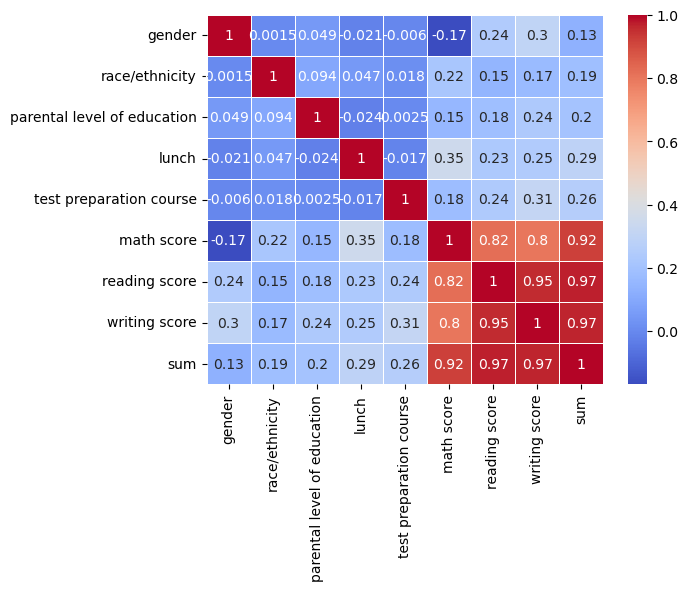

In [47]:
sns.heatmap(df.corr(), annot=True,linewidths=.5, cmap="coolwarm")

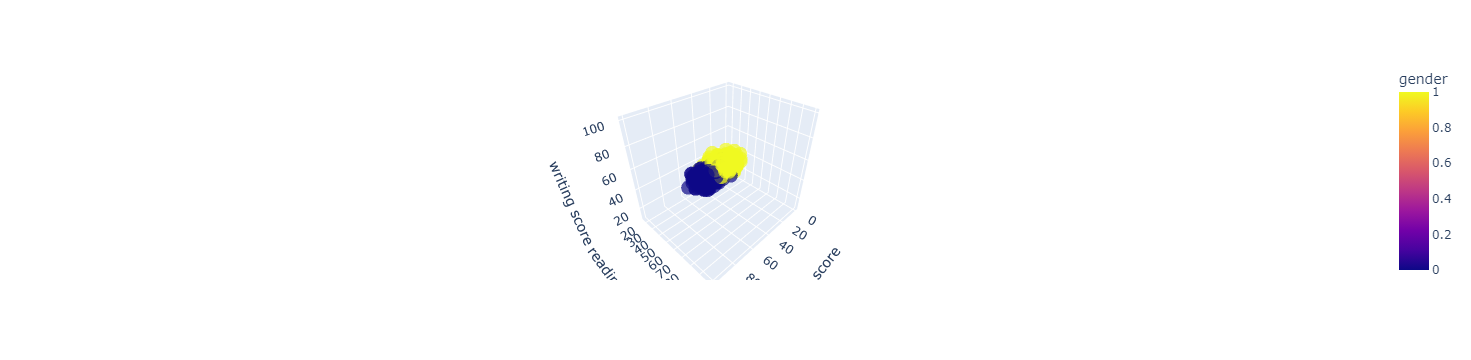

In [48]:
fig = px.scatter_3d(df, x='math score', y='reading score', z='writing score', color='gender', opacity=0.7)
fig.show()

## Dimensionality reduction - PCA

Accuracy of PCA :  0.9999999999999998


Text(0, 0.5, 'Eexplained variance ratio')

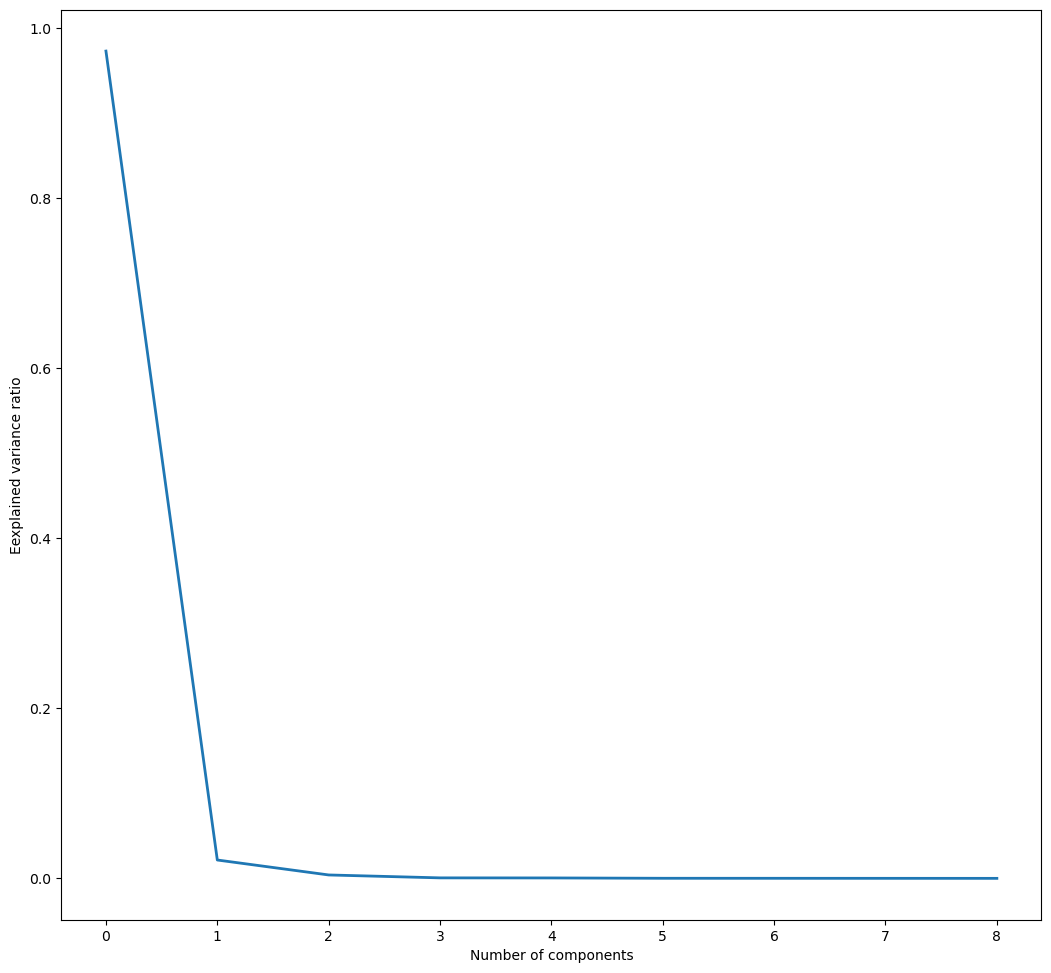

In [49]:
pca = PCA()
pca.fit(df)
df_pca = pca.transform(df)
print("Accuracy of PCA : ", sum(pca.explained_variance_ratio_))
plt.figure(1, figsize=(14, 13))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('Number of components')
plt.ylabel('Eexplained variance ratio')

In [50]:
pca = PCA(n_components = 2, whiten= True)
pca.fit(df)

df_pca = pca.transform(df)
print("Accuracy of PCA : ", sum(pca.explained_variance_ratio_))

Accuracy of PCA :  0.9947300159613633


In [51]:
df_new = pd.DataFrame(dict(p1 = df_pca[:, 0], p2 = df_pca[:, 1] ))
df = pd.concat([df,df_new], axis=1)
df

gender  race/ethnicity  parental level of education  lunch  \
0         1               1                            3      1   
1         1               2                            2      1   
2         1               1                            4      1   
3         0               0                            1      0   
4         0               2                            2      1   
..      ...             ...                          ...    ...   
995       1               4                            4      1   
996       0               2                            0      0   
997       1               2                            0      0   
998       1               3                            2      1   
999       1               3                            2      0   

     test preparation course  math score  reading score  writing score  sum  \
0                          0          72             72             74  218   
1                          1          69             90             88  247   
2                          0          90             95             93  278   
3                          0          47             57             44  148   
4                          0          76             78             75  229   
..                       ...         ...            ...            ...  ...   
995                        1          88             99             95  282   
996                        0          62             55             55  172   
997                        1          59             71             65  195   
998                        1          68             78             77  223   
999                        0          77             86             86  249   

           p1        p2  
0   -0.343548  0.161633  
1   -1.023658 -1.873041  
2   -1.746176 -0.065967  
3    1.294343 -0.115728  
4   -0.600046  0.272941  
..        ...       ...  
995 -1.840468 -0.595398  
996  0.733336  1.008341  
997  0.194058 -0.702156  
998 -0.461399 -0.748154  
999 -1.069092 -0.663606  

[1000 rows x 11 columns]

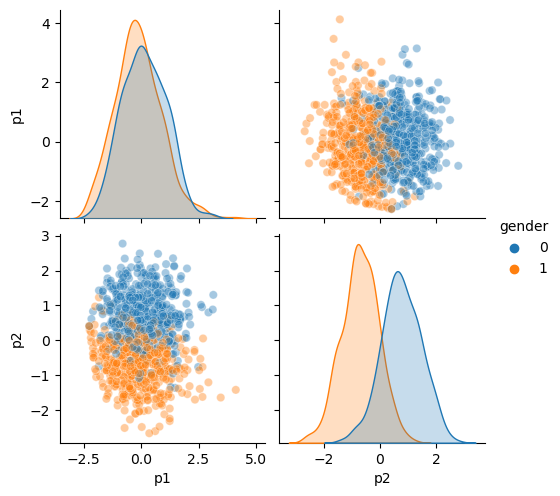

In [52]:
sns.pairplot(df[["gender", "p1", "p2"]], hue="gender",plot_kws=dict(alpha=0.4))

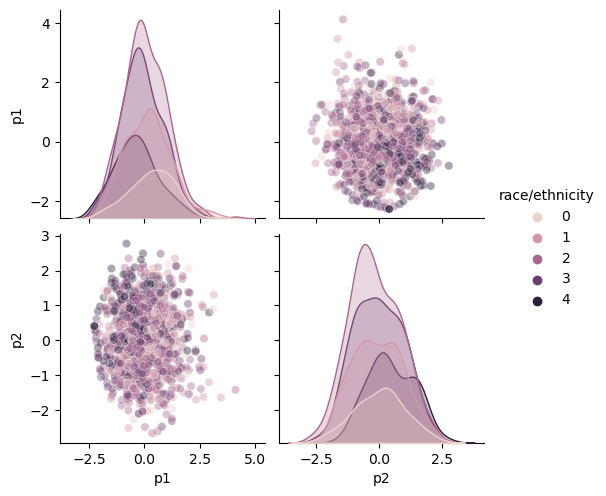

In [53]:
sns.pairplot(df[["race/ethnicity", "p1", "p2"]], hue="race/ethnicity",plot_kws=dict(alpha=0.4))

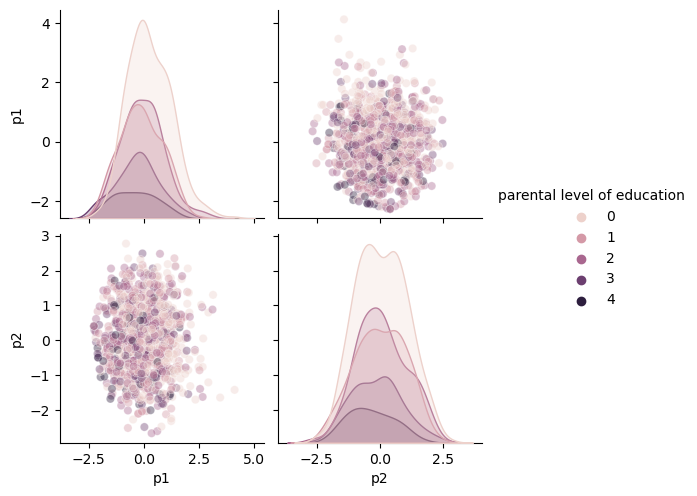

In [54]:
sns.pairplot(df[["parental level of education", "p1", "p2"]], hue="parental level of education",plot_kws=dict(alpha=0.4))

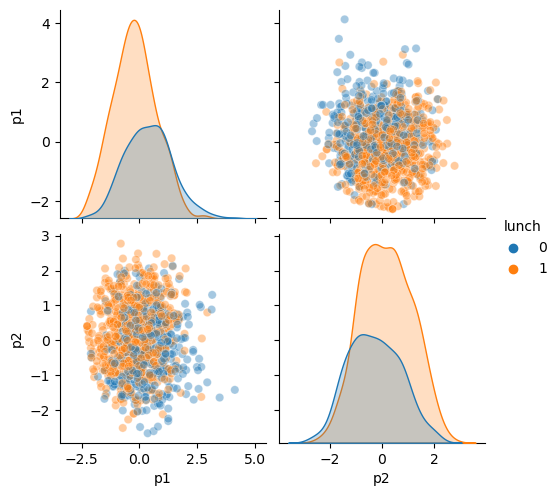

In [55]:
sns.pairplot(df[["lunch", "p1", "p2"]], hue="lunch",plot_kws=dict(alpha=0.4))

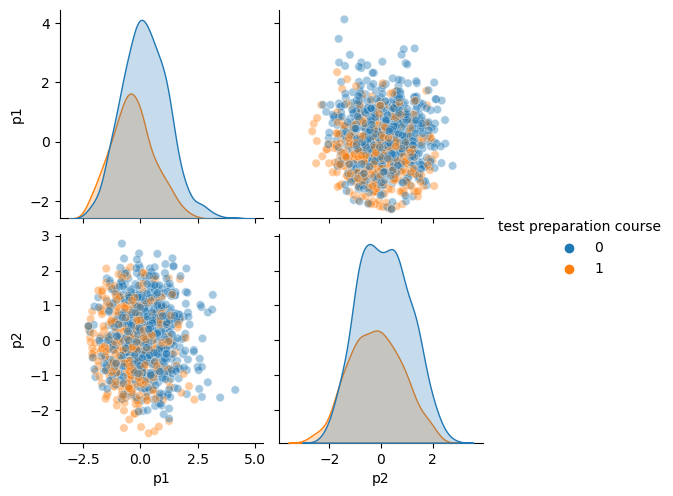

In [56]:
sns.pairplot(df[["test preparation course", "p1", "p2"]], hue="test preparation course",plot_kws=dict(alpha=0.4))

## Outliers

### IQR

In [57]:
def out_iqr(df , column):
    global lower,upper
    q25, q75 = np.quantile(df[column], 0.25), np.quantile(df[column], 0.75)
    # calculate the IQR
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    # calculate the lower and upper bound value
    lower, upper = q25 - cut_off, q75 + cut_off
    print('The IQR is',iqr)
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

The IQR is 20.0
The lower bound value is 27.0
The upper bound value is 107.0
Total number of outliers are 8


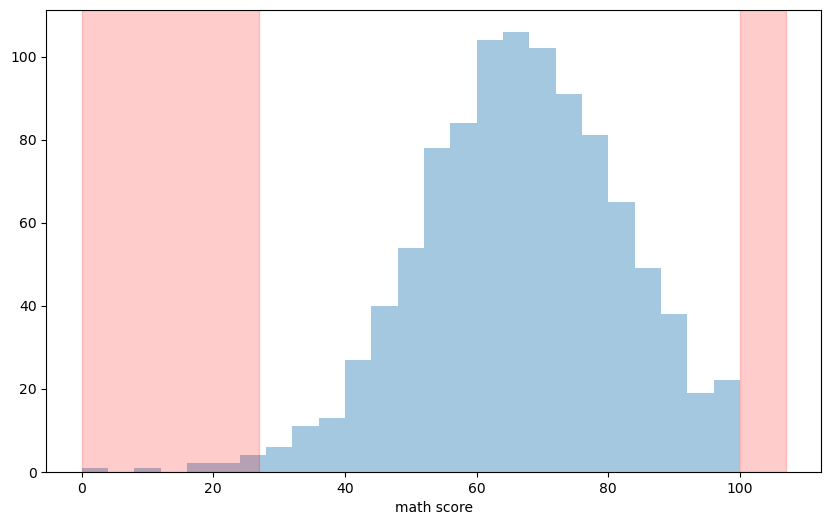

In [58]:
out_iqr(df,'math score')
df_outliers_removed_iqr = df[(df['math score'] < upper) | (df['math score'] > lower)]

plt.figure(figsize = (10,6))
sns.distplot(df['math score'], kde=False)
plt.axvspan(xmin = lower,xmax= df['math score'].min(),alpha=0.2, color='red')
plt.axvspan(xmin = upper,xmax= df['math score'].max(),alpha=0.2, color='red')

The IQR is 20.0
The lower bound value is 29.0
The upper bound value is 109.0
Total number of outliers are 6


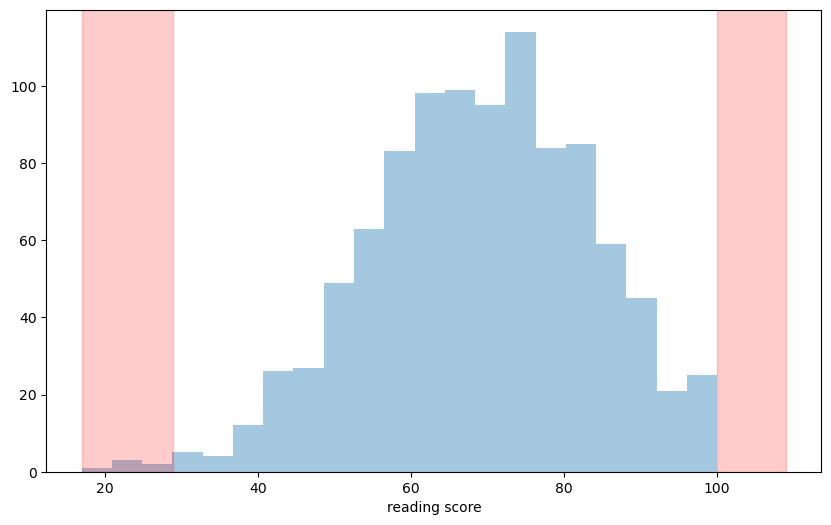

In [59]:
out_iqr(df,'reading score')
df_outliers_removed_iqr = df_outliers_removed_iqr[(df_outliers_removed_iqr['reading score'] < upper) | (df_outliers_removed_iqr['reading score'] > lower)]

plt.figure(figsize = (10,6))
sns.distplot(df['reading score'], kde=False)
plt.axvspan(xmin = lower,xmax= df['reading score'].min(),alpha=0.2, color='red')
plt.axvspan(xmin = upper,xmax= df['reading score'].max(),alpha=0.2, color='red')

The IQR is 21.25
The lower bound value is 25.875
The upper bound value is 110.875
Total number of outliers are 5


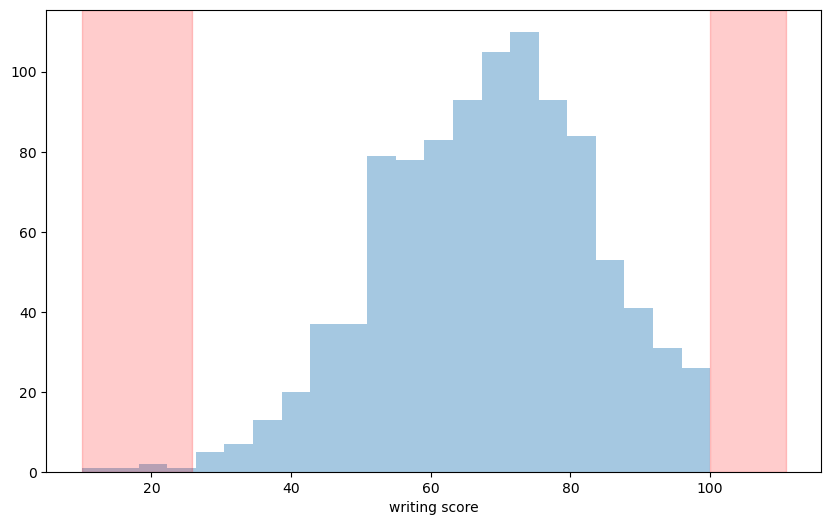

In [60]:
out_iqr(df,'writing score')
df_outliers_removed_iqr = df_outliers_removed_iqr[(df_outliers_removed_iqr['writing score'] < upper) | (df_outliers_removed_iqr['writing score'] > lower)]

plt.figure(figsize = (10,6))
sns.distplot(df['writing score'], kde=False)
plt.axvspan(xmin = lower,xmax= df['writing score'].min(),alpha=0.2, color='red')
plt.axvspan(xmin = upper,xmax= df['writing score'].max(),alpha=0.2, color='red')

### Standard deviation 

In [61]:
def out_std(df, column):
    global lower,upper
    # calculate the mean and standard deviation of the data frame
    data_mean, data_std = df[column].mean(), df[column].std()
    # calculate the cutoff value
    cut_off = data_std * 3
    # calculate the lower and upper bound value
    lower, upper = data_mean - cut_off, data_mean + cut_off
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

The lower bound value is 20.599759711971593
The upper bound value is 111.57824028802841
Total number of outliers are 4


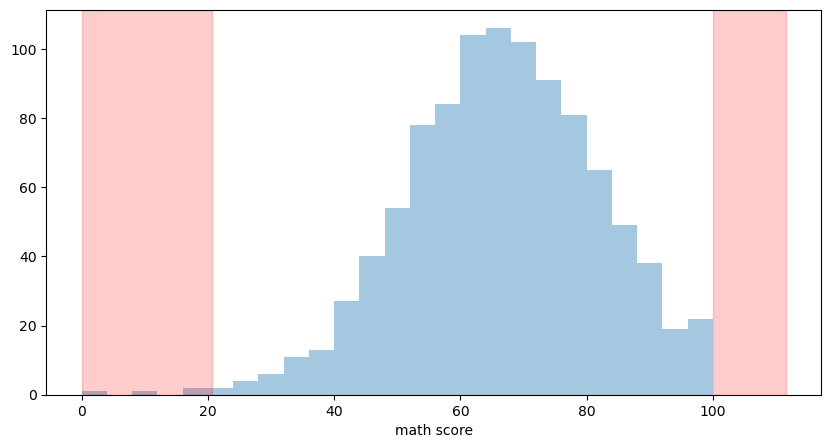

In [62]:
out_std(df,'math score')
df_outliers_removed_std = df[(df['writing score'] < upper) | (df['writing score'] > lower)]

plt.figure(figsize = (10,5))
sns.distplot(df['math score'], kde=False)
plt.axvspan(xmin = lower,xmax= df['math score'].min(),alpha=0.2, color='red')
plt.axvspan(xmin = upper,xmax= df['math score'].max(),alpha=0.2, color='red')

The lower bound value is 25.36842418824334
The upper bound value is 112.96957581175666
Total number of outliers are 4


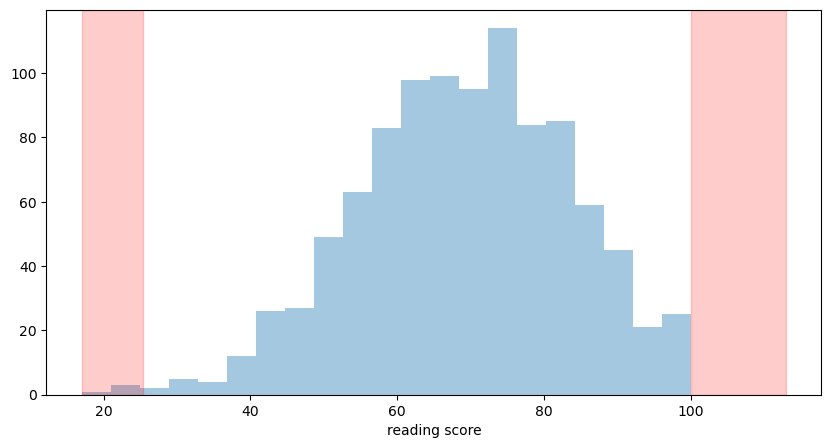

In [63]:
out_std(df,'reading score')
df_outliers_removed_std = df_outliers_removed_std[(df_outliers_removed_std['writing score'] < upper) | (df_outliers_removed_std['writing score'] > lower)]

plt.figure(figsize = (10,5))
sns.distplot(df['reading score'], kde=False)
plt.axvspan(xmin = lower,xmax= df['reading score'].min(),alpha=0.2, color='red')
plt.axvspan(xmin = upper,xmax= df['reading score'].max(),alpha=0.2, color='red')

The lower bound value is 22.467028967391073
The upper bound value is 113.64097103260893
Total number of outliers are 4


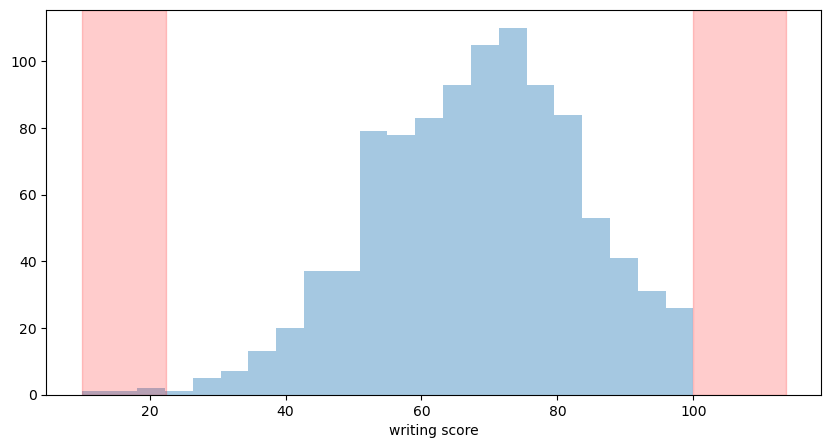

In [64]:
out_std(df,'writing score')
df_outliers_removed_std = df_outliers_removed_std[(df_outliers_removed_std['writing score'] < upper) | (df_outliers_removed_std['writing score'] > lower)]

plt.figure(figsize = (10,5))
sns.distplot(df['writing score'], kde=False)
plt.axvspan(xmin = lower,xmax= df['writing score'].min(),alpha=0.2, color='red')
plt.axvspan(xmin = upper,xmax= df['writing score'].max(),alpha=0.2, color='red')

### Z-Score

In [65]:
def out_zscore(data):
    global outliers,zscore
    outliers = []
    zscore = []
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score= (i - mean)/std 
        zscore.append(z_score)
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return print("Total number of outliers are",len(outliers))

Total number of outliers are 4


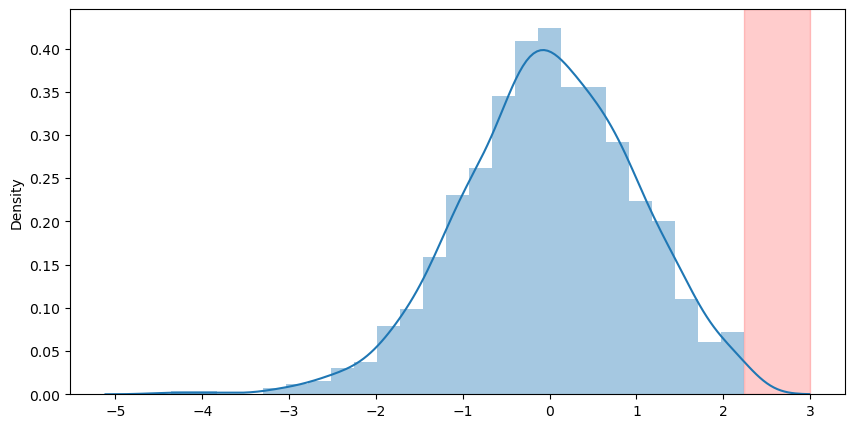

In [66]:
out_zscore(df['math score'])
df_outliers_removed_z = df[(df['math score'] < 3) | (df['math score'] > -3)]

plt.figure(figsize = (10,5))
sns.distplot(zscore)
plt.axvspan(xmin = 3 ,xmax= max(zscore),alpha=0.2, color='red')

Total number of outliers are 4


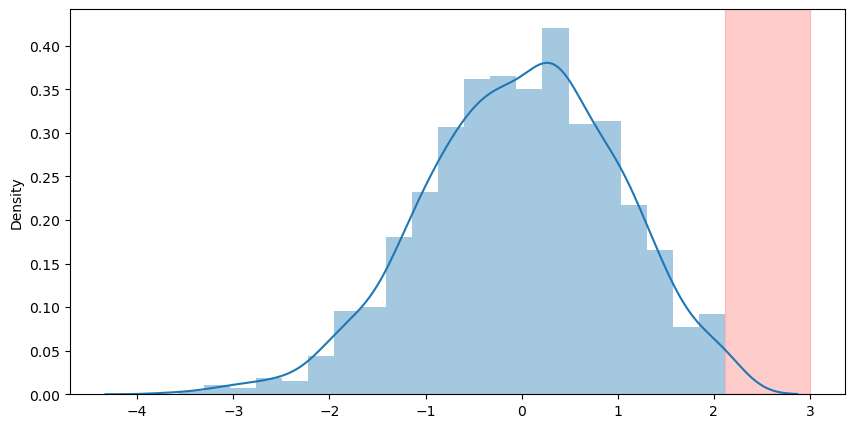

In [67]:
out_zscore(df['reading score'])
df_outliers_removed_z = df_outliers_removed_z[(df_outliers_removed_z['reading score'] < 3) | (df_outliers_removed_z['reading score'] > -3)]

plt.figure(figsize = (10,5))
sns.distplot(zscore)
plt.axvspan(xmin = 3 ,xmax= max(zscore),alpha=0.2, color='red')

Total number of outliers are 4


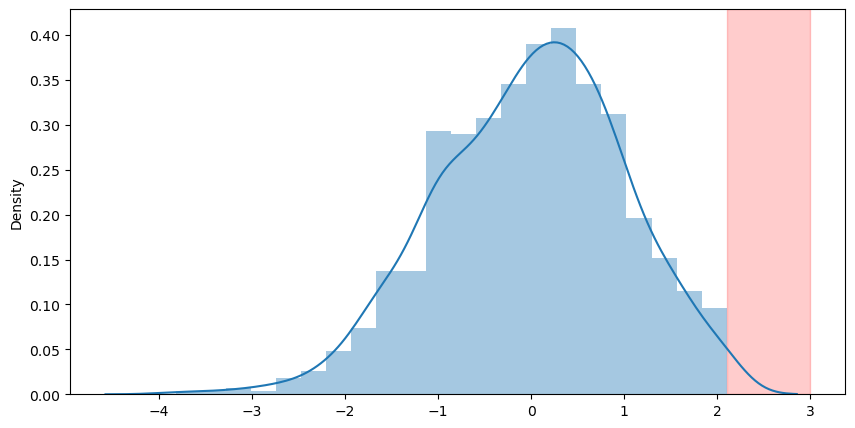

In [68]:
out_zscore(df['writing score'])
df_outliers_removed_z = df_outliers_removed_z[(df_outliers_removed_z['writing score'] < 3) | (df_outliers_removed_z['writing score'] > -3)]

plt.figure(figsize = (10,5))
sns.distplot(zscore)
plt.axvspan(xmin = 3 ,xmax= max(zscore),alpha=0.2, color='red')

### Isolation Forest

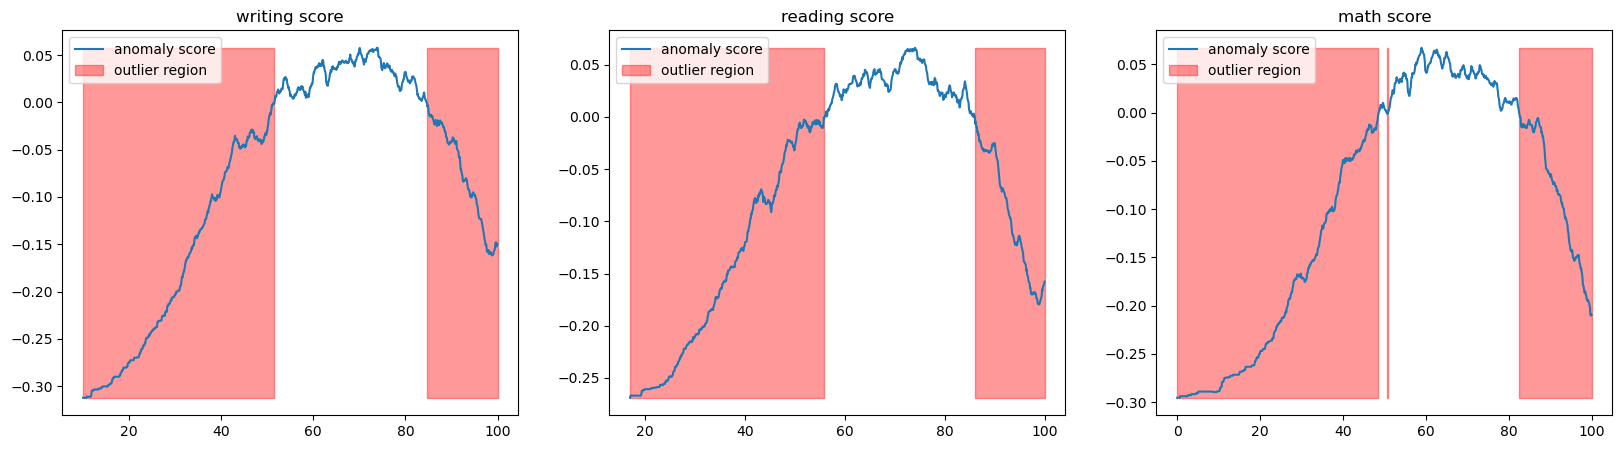

In [69]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5), facecolor='w', edgecolor='k')
axs = axs.ravel()
cols = ['writing score','reading score','math score']

for i, column in enumerate(cols):
    isolation_forest = IsolationForest(contamination='auto')
    isolation_forest.fit(df[column].values.reshape(-1,1))

    xx = np.linspace(df[column].min(), df[column].max(), len(df)).reshape(-1,1)
    anomaly_score = isolation_forest.decision_function(xx)
    outlier = isolation_forest.predict(xx)
    
    axs[i].plot(xx, anomaly_score, label='anomaly score')
    axs[i].fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                     where=outlier==-1, color='r', 
                     alpha=.4, label='outlier region')
    axs[i].legend()
    axs[i].set_title(column)

## Scaling 

### MinMax

In [70]:
scaler = MinMaxScaler()
df_no_outliers_scaled_minmax = pd.DataFrame(scaler.fit_transform(df_outliers_removed_std).copy(), columns = list(df_outliers_removed_std.columns))
df_no_outliers_scaled_minmax.head()

gender  race/ethnicity  parental level of education  lunch  \
0     1.0            0.25                         0.75    1.0   
1     1.0            0.50                         0.50    1.0   
2     1.0            0.25                         1.00    1.0   
3     0.0            0.00                         0.25    0.0   
4     0.0            0.50                         0.50    1.0   

   test preparation course  math score  reading score  writing score  \
0                      0.0        0.72       0.662651       0.711111   
1                      1.0        0.69       0.879518       0.866667   
2                      0.0        0.90       0.939759       0.922222   
3                      0.0        0.47       0.481928       0.377778   
4                      0.0        0.76       0.734940       0.722222   

        sum        p1        p2  
0  0.699634  0.300383  0.519782  
1  0.805861  0.193799  0.146146  
2  0.919414  0.080569  0.477987  
3  0.443223  0.557067  0.468849  
4  0.739927  0.260186  0.540222

### Robust

In [71]:
scaler=RobustScaler()
df_no_outliers_scaled_robust = pd.DataFrame(scaler.fit_transform(df_outliers_removed_std).copy(), columns = list(df_outliers_removed_std.columns))
df_no_outliers_scaled_robust.head()

gender  race/ethnicity  parental level of education  lunch  \
0     0.0            -0.5                          1.0    0.0   
1     0.0             0.0                          0.5    0.0   
2     0.0            -0.5                          1.5    0.0   
3    -1.0            -1.0                          0.0   -1.0   
4    -1.0             0.0                          0.5    0.0   

   test preparation course  math score  reading score  writing score  \
0                      0.0        0.30           0.10       0.235294   
1                      1.0        0.15           1.00       0.894118   
2                      0.0        1.20           1.25       1.129412   
3                      0.0       -0.95          -0.65      -1.176471   
4                      0.0        0.50           0.40       0.282353   

        sum        p1        p2  
0  0.224138 -0.222646  0.121535  
1  0.724138 -0.723437 -1.239389  
2  1.258621 -1.255456 -0.030698  
3 -0.982759  0.983398 -0.063982  
4  0.413793 -0.411515  0.195986

### Standard

In [72]:
scaler = StandardScaler()
df_no_outliers_scaled_standard = pd.DataFrame(scaler.fit_transform(df_outliers_removed_std).copy(), columns = list(df_outliers_removed_std.columns))
df_no_outliers_scaled_standard.head()

gender  race/ethnicity  parental level of education     lunch  \
0  0.964625       -1.015044                     1.401503  0.741881   
1  0.964625       -0.150441                     0.594186  0.741881   
2  0.964625       -1.015044                     2.208820  0.741881   
3 -1.036672       -1.879647                    -0.213132 -1.347925   
4 -1.036672       -0.150441                     0.594186  0.741881   

   test preparation course  math score  reading score  writing score  \
0                -0.746748    0.390024       0.193999       0.391492   
1                 1.339140    0.192076       1.427476       1.313269   
2                -0.746748    1.577711       1.770109       1.642475   
3                -0.746748   -1.259543      -0.833899      -1.583744   
4                -0.746748    0.653954       0.605158       0.457333   

        sum        p1        p2  
0  0.343574 -0.343719  0.161714  
1  1.021927 -1.024170 -1.873978  
2  1.747064 -1.747050 -0.066000  
3 -1.293830  1.294991 -0.115786  
4  0.600881 -0.600346  0.273078

## Clustering methods

### K Means

In [112]:
scores = df_no_outliers_scaled_standard[score_labels]
wcss = []

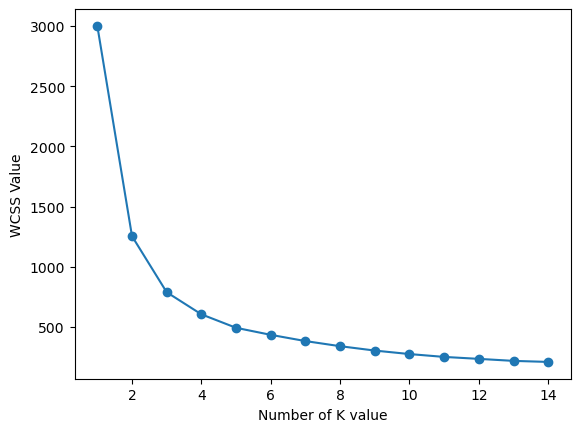

In [113]:
for i in range(1,15):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(scores)
    wcss.append(kmeans.inertia_)


plt.plot(range(1,15),wcss,"-o")
plt.xlabel("Number of K value")
plt.ylabel("WCSS Value")
plt.show()

#### Clustering PCA reduced data

In [114]:
#kmeans = KMeans(n_clusters = 2)
#clusters = kmeans.fit_predict(df)

In [115]:
#df_new['clusters'] = clusters
#df['clusters_pca2'] = clusters

In [116]:
'''
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(17, 5))

ax1.scatter(df.p1[df.gender == 1], df.p2[df.gender == 1], alpha=0.5)
ax1.scatter(df.p1[df.gender == 0], df.p2[df.gender == 0], alpha=0.5)
ax1.set_title('Accurate Data')

ax2.scatter(df_new.p1, df_new.p2, alpha=0.6, color="black")
ax2.set_title('Data Without Clustering')

ax3.scatter(df_new.p1[df_new.clusters == 0], df_new.p2[df_new.clusters == 0], alpha=0.5)
ax3.scatter(df_new.p1[df_new.clusters == 1], df_new.p2[df_new.clusters == 1], alpha=0.5)
ax3.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color="yellow", s=150)
ax3.set_title('Data With K-Means Clustering Algorithm')

plt.show()
'''

'\nfig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(17, 5))\n\nax1.scatter(df.p1[df.gender == 1], df.p2[df.gender == 1], alpha=0.5)\nax1.scatter(df.p1[df.gender == 0], df.p2[df.gender == 0], alpha=0.5)\nax1.set_title(\'Accurate Data\')\n\nax2.scatter(df_new.p1, df_new.p2, alpha=0.6, color="black")\nax2.set_title(\'Data Without Clustering\')\n\nax3.scatter(df_new.p1[df_new.clusters == 0], df_new.p2[df_new.clusters == 0], alpha=0.5)\nax3.scatter(df_new.p1[df_new.clusters == 1], df_new.p2[df_new.clusters == 1], alpha=0.5)\nax3.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color="yellow", s=150)\nax3.set_title(\'Data With K-Means Clustering Algorithm\')\n\nplt.show()\n'

In [133]:
def clustering_score(method, name, data):
    scores = []
    for i in range(2,10):
        m1=KMeans(n_clusters=i, random_state=42)
        c = m1.fit_predict(data)
        scores.append(method(data, m1.fit_predict(data))) 
    plt.bar(range(2,10), scores) 
    plt.xlabel('Number of clusters', fontsize = 20) 
    plt.ylabel('S(i)', fontsize = 20) 
    plt.show()
    
    mx = max(scores)
    number_of_clusters=scores.index(mx)+2
    print("Number of Cluster Required is : ", number_of_clusters)
    print("Max score: ", mx)
    print("For method: " + name)    
    
    return scores.index(mx)+2

Silhouette method

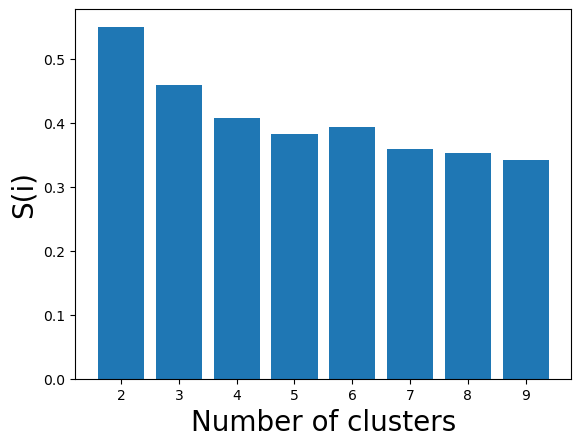

Number of Cluster Required is :  2
Max score:  0.550591661010792
For method: Silhouette


In [134]:
best_num_clusters = clustering_score(silhouette_score, "Silhouette", scores)

Calinski Harabasz

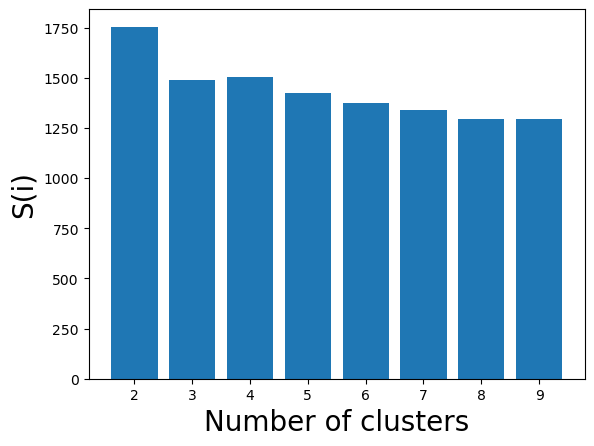

Number of Cluster Required is :  2
Max score:  1754.6300662284034
For method: Calinski Harabasz


In [135]:
best_num_clusters = clustering_score(calinski_harabasz_score, "Calinski Harabasz", scores )

In [136]:
kmeans = KMeans(n_clusters = best_num_clusters)
clusters = kmeans.fit_predict(scores)
scores["clusters_kmean"] = clusters


fig = px.scatter_3d(scores, x='math score', y='reading score', z='writing score', color='clusters_kmean', opacity=0.7)
fig.show()


In [137]:
print('KMeans Silhouette score: {}'.format(silhouette_score(scores, kmeans.labels_, 
                                          )))
print('KMeans Calinski Harabasz score: {}'.format(calinski_harabasz_score(scores, kmeans.labels_, 
                                          )))

KMeans Silhouette score: 0.5751703063837659
KMeans Calinski Harabasz score: 1898.3414373367698


### Hierarchical Clustering

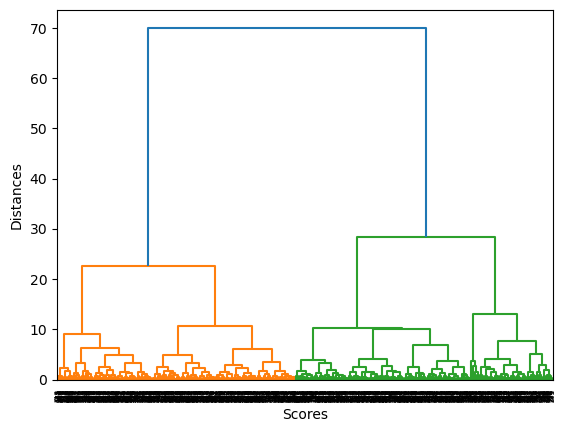

In [138]:
merg = linkage(scores, method = "ward")
dendrogram(merg,leaf_rotation=90)
plt.xlabel("Scores")
plt.ylabel("Distances")
plt.show()

### Agglomerative Clustering


In [139]:
hc = AgglomerativeClustering(n_clusters=best_num_clusters,affinity="euclidean",linkage="ward")
cluster = hc.fit_predict(scores[score_labels])

scores["clusters_agglomerative"] = cluster

fig = px.scatter_3d(scores, x='math score', y='reading score', z='writing score', color='clusters_agglomerative', opacity=0.7)
fig.show()

In [140]:
print('Agglomerative Silhouette score: {}'.format(silhouette_score(scores, hc.labels_, 
                                          )))
print('Agglomerative Calinski Harabasz score: {}'.format(calinski_harabasz_score(scores, hc.labels_, 
                                          )))

Agglomerative Silhouette score: 0.5751275294873415
Agglomerative Calinski Harabasz score: 1896.740728682974


### DBSCAN

In [141]:
dbscan = DBSCAN()
clusters = dbscan.fit_predict(scores[score_labels])

scores["clusters_dbscan"] = cluster

fig = px.scatter_3d(scores, x='math score', y='reading score', z='writing score', color='clusters_dbscan', opacity=0.7)
fig.show()

In [142]:
print('DBSCAN Silhouette score: {}'.format(silhouette_score(scores, dbscan.labels_, 
                                          )))
print('DBSCAN Calinski Harabasz score: {}'.format(calinski_harabasz_score(scores, dbscan.labels_, 
                                          )))

DBSCAN Silhouette score: 0.4881318195572645
DBSCAN Calinski Harabasz score: 56.70852591806274


In [143]:
df_non_encoded['clusters_kmean'] = scores['clusters_kmean'] 
df_non_encoded

gender race/ethnicity parental level of education         lunch  \
0    female              B           bachelor's degree      standard   
1    female              C                     college      standard   
2    female              B             master's degree      standard   
3      male              A          associate's degree  free/reduced   
4      male              C                     college      standard   
..      ...            ...                         ...           ...   
995  female              E             master's degree      standard   
996    male              C                 high school  free/reduced   
997  female              C                 high school  free/reduced   
998  female              D                     college      standard   
999  female              D                     college  free/reduced   

    test preparation course  math score  reading score  writing score  sum  \
0                      none          72             72             74  218   
1                 completed          69             90             88  247   
2                      none          90             95             93  278   
3                      none          47             57             44  148   
4                      none          76             78             75  229   
..                      ...         ...            ...            ...  ...   
995               completed          88             99             95  282   
996                    none          62             55             55  172   
997               completed          59             71             65  195   
998               completed          68             78             77  223   
999                    none          77             86             86  249   

     clusters_kmean  
0                 0  
1                 0  
2                 0  
3                 1  
4                 0  
..              ...  
995               0  
996               1  
997               1  
998               0  
999               0  

[1000 rows x 10 columns]

## Analysis

### Gender

Text(0.5, 0, 'Ranks')

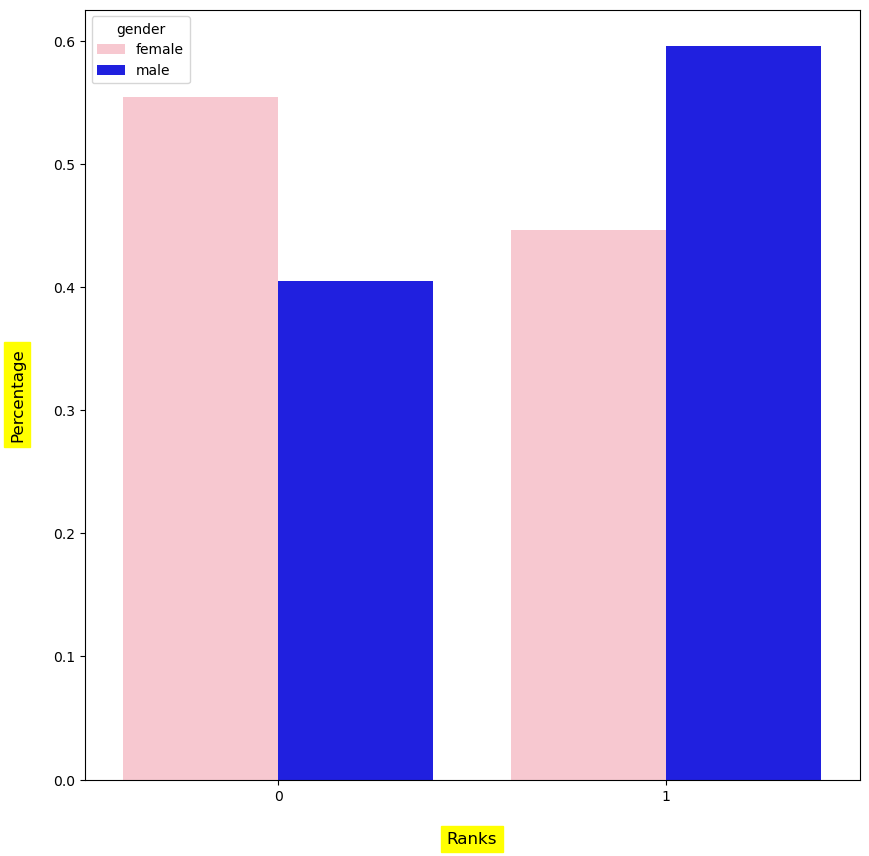

In [144]:
desc = df_non_encoded.groupby(['clusters_kmean','gender'])['sum'].describe()
desc.reset_index(level = [0,1],inplace = True)
count_female = desc.loc[desc['gender']=='female']['count'].sum()
count_male = desc.loc[desc['gender']=='male']['count'].sum()
index_female = desc.loc[desc['gender']=='female'].index
index_male = desc.loc[desc['gender']=='male'].index
desc['percentage'] = pd.Series()
for row in index_female:
    desc.loc[row,'percentage']= desc.loc[row,'count']/count_female
for row in index_male:
    desc.loc[row,'percentage']= desc.loc[row,'count']/count_male
desc
plt.figure(figsize = (10,10))
ax = plt.subplot(111)
sns.barplot(x = 'clusters_kmean',y ='percentage' ,data = desc,hue = 'gender',palette = ['pink','blue'])
ax.set_ylabel('Percentage', size = 'large', backgroundcolor = 'yellow',labelpad = 20)
ax.set_xlabel('Ranks', size = 'large',backgroundcolor = 'yellow',labelpad = 20)

no gender based trend

### Parental education level

<AxesSubplot: xlabel='clusters_kmean', ylabel='percentage'>

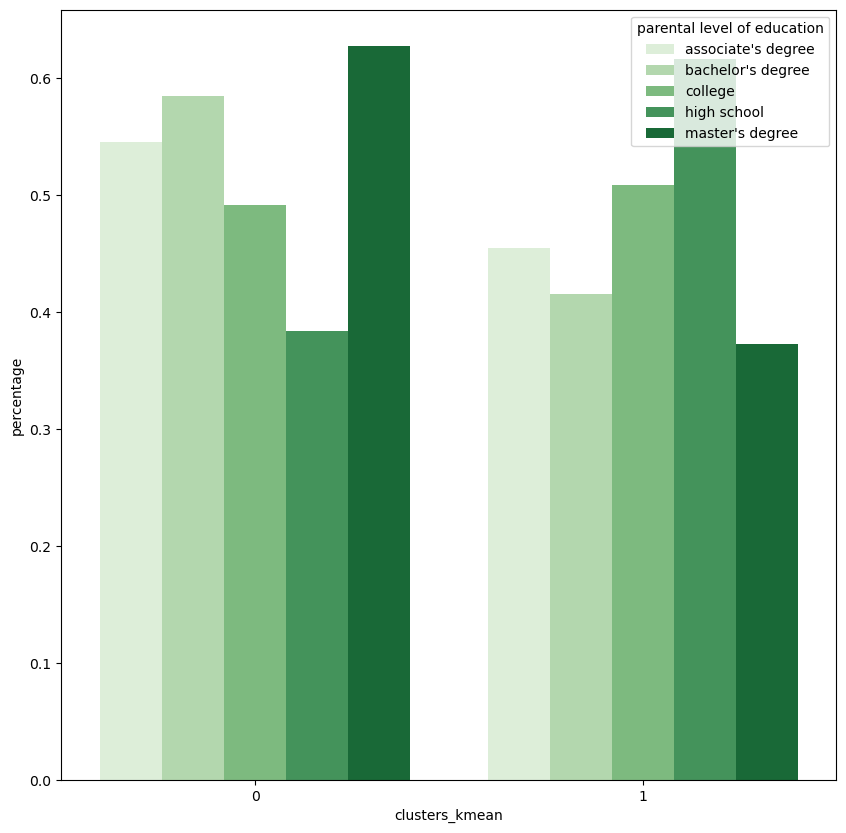

In [145]:
desc = df_non_encoded.groupby(['clusters_kmean','parental level of education'])['sum'].describe()
desc.reset_index(level = [0,1],inplace = True)
count_hs = desc.loc[desc['parental level of education']=='high school']['count'].sum()
count_ad = desc.loc[desc['parental level of education']=="associate's degree"]['count'].sum()
count_college = desc.loc[desc['parental level of education']=='college']['count'].sum()
count_bd = desc.loc[desc['parental level of education']=="bachelor's degree"]['count'].sum()
count_md = desc.loc[desc['parental level of education']=="master's degree"]['count'].sum()

index_hs = desc.loc[desc['parental level of education']=='high school'].index
index_ad = desc.loc[desc['parental level of education']=="associate's degree"].index
index_college = desc.loc[desc['parental level of education']=='college'].index
index_bd = desc.loc[desc['parental level of education']=="bachelor's degree"].index
index_md = desc.loc[desc['parental level of education']=="master's degree"].index

desc['percentage'] = pd.Series()
for row in index_hs:
    desc.loc[row,'percentage']= desc.loc[row,'count']/count_hs
for row in index_ad:
    desc.loc[row,'percentage']= desc.loc[row,'count']/count_ad
for row in index_college:
    desc.loc[row,'percentage']= desc.loc[row,'count']/count_college
for row in index_bd:
    desc.loc[row,'percentage']= desc.loc[row,'count']/count_bd
for row in index_md:
    desc.loc[row,'percentage']= desc.loc[row,'count']/count_md
desc
plt.figure(figsize = (10,10))
sns.barplot(x = 'clusters_kmean',y ='percentage' ,data = desc,hue = 'parental level of education', palette = 'Greens')

### Lunch

Text(0.5, 0, 'Ranks')

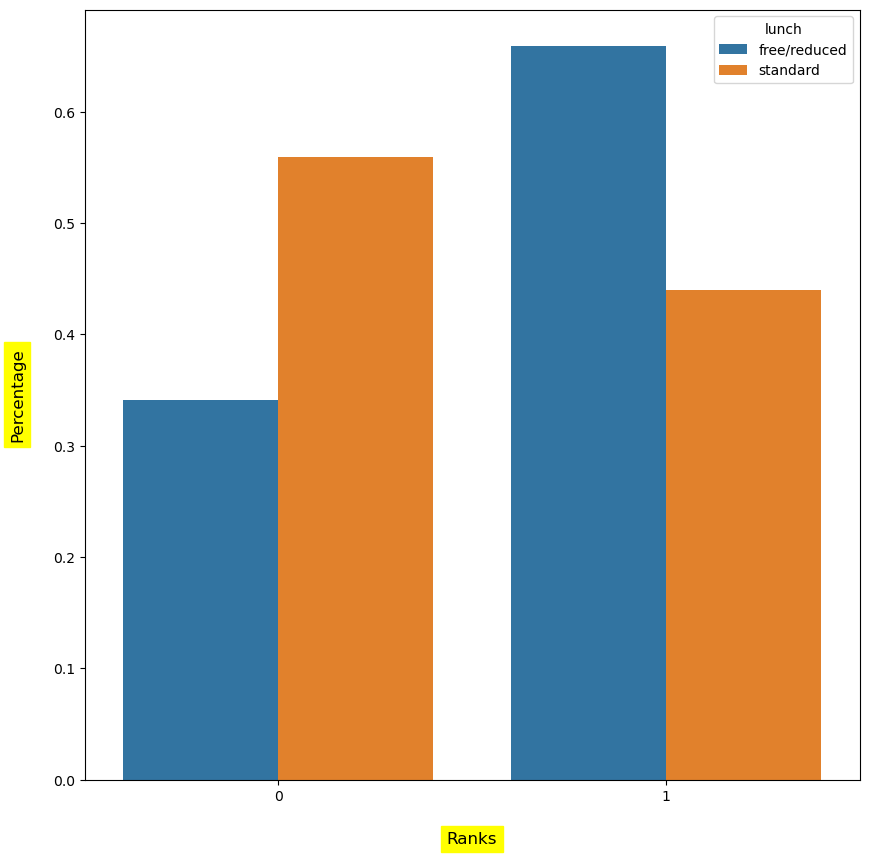

In [146]:
desc = df_non_encoded.groupby(['clusters_kmean','lunch'])['sum'].describe()
desc.reset_index(level = [0,1],inplace = True)
count_free = desc.loc[desc['lunch']=='free/reduced']['count'].sum()
count_standard = desc.loc[desc['lunch']=='standard']['count'].sum()
index_free = desc.loc[desc['lunch']=='free/reduced'].index
index_standard = desc.loc[desc['lunch']=='standard'].index
desc['percentage'] = pd.Series()
for row in index_free:
    desc.loc[row,'percentage']= desc.loc[row,'count']/count_free
for row in index_standard:
    desc.loc[row,'percentage']= desc.loc[row,'count']/count_standard
desc
plt.figure(figsize = (10,10))
ax = plt.subplot(111)
sns.barplot(x = 'clusters_kmean',y ='percentage' ,data = desc,hue = 'lunch')
ax.set_ylabel('Percentage', size = 'large', backgroundcolor = 'yellow',labelpad = 20)
ax.set_xlabel('Ranks', size = 'large',backgroundcolor = 'yellow',labelpad = 20)

### Preparation test

Text(0.5, 0, 'Ranks')

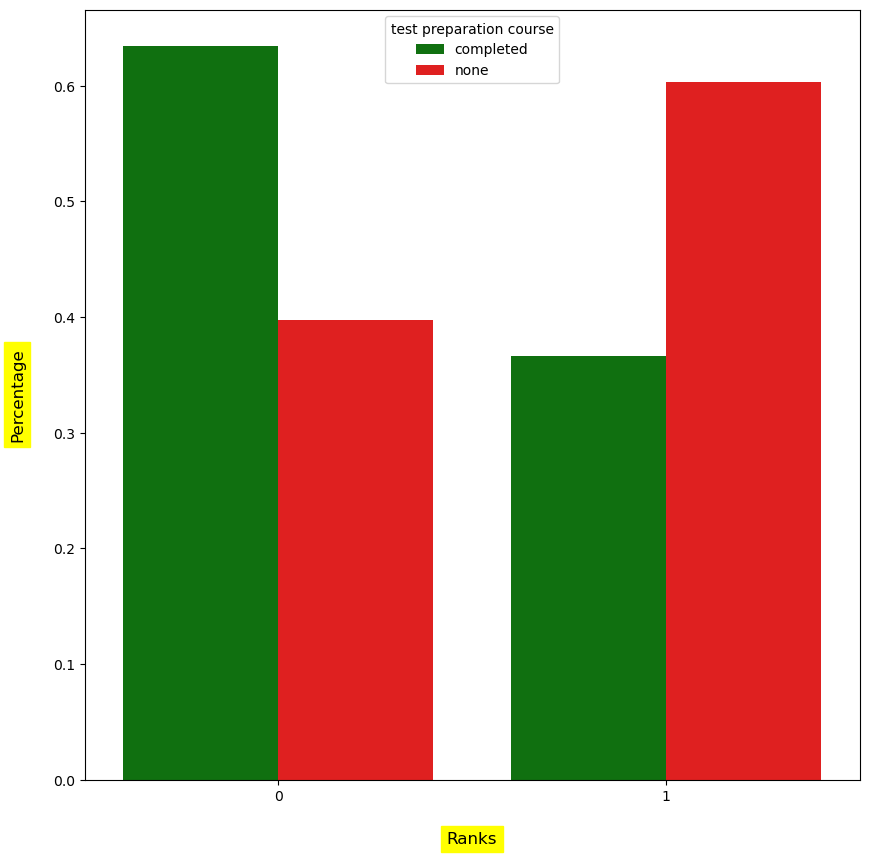

In [147]:
desc = df_non_encoded.groupby(['clusters_kmean','test preparation course'])['sum'].describe()
desc.reset_index(level = [0,1],inplace = True)
count_none = desc.loc[desc['test preparation course']=='none']['count'].sum()
count_completed = desc.loc[desc['test preparation course']=='completed']['count'].sum()
index_none = desc.loc[desc['test preparation course']=='none'].index
index_completed = desc.loc[desc['test preparation course']=='completed'].index
desc['percentage'] = pd.Series()
for row in index_none:
    desc.loc[row,'percentage']= desc.loc[row,'count']/count_none
for row in index_completed:
    desc.loc[row,'percentage']= desc.loc[row,'count']/count_completed
desc
plt.figure(figsize = (10,10))
ax = plt.subplot(111)
sns.barplot(x = 'clusters_kmean',y ='percentage' ,data = desc,hue = 'test preparation course',palette = ['green','red'])
ax.set_ylabel('Percentage', size = 'large', backgroundcolor = 'yellow',labelpad = 20)
ax.set_xlabel('Ranks', size = 'large',backgroundcolor = 'yellow',labelpad = 20)

### Race/Ethnicity

Text(0.5, 0, 'Ranks')

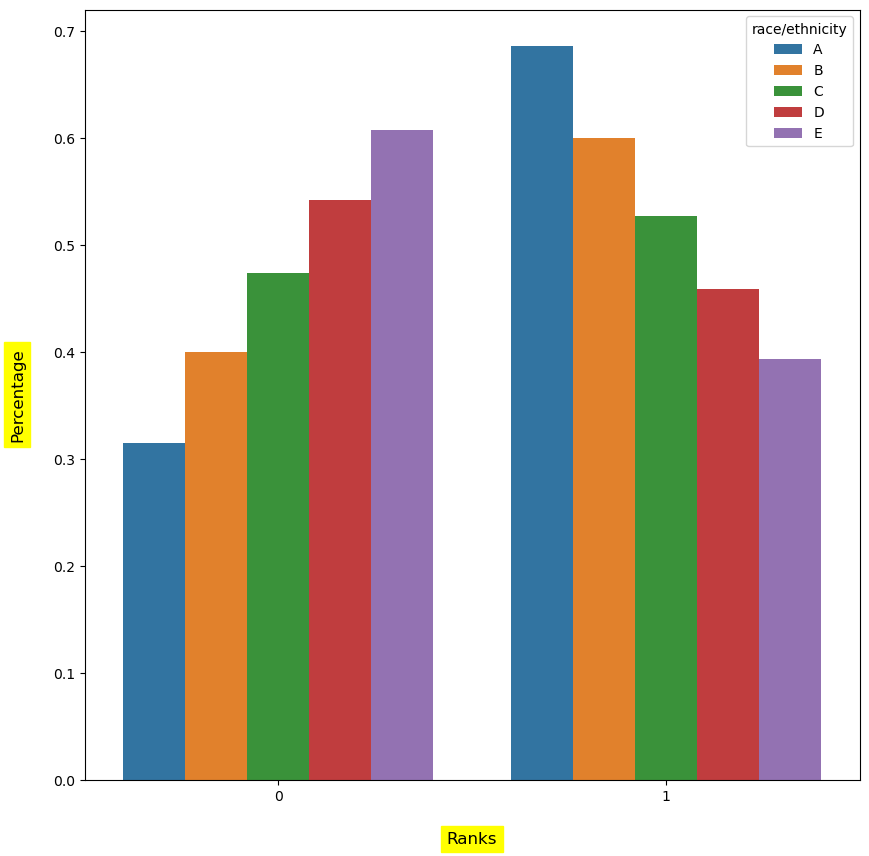

In [148]:
desc = df_non_encoded.groupby(['clusters_kmean','race/ethnicity'])['sum'].describe()
desc.reset_index(level = [0,1],inplace = True)
count_a = desc.loc[desc['race/ethnicity']=='A']['count'].sum()
count_b = desc.loc[desc['race/ethnicity']=='B']['count'].sum()
count_c = desc.loc[desc['race/ethnicity']=='C']['count'].sum()
count_d = desc.loc[desc['race/ethnicity']=='D']['count'].sum()
count_e = desc.loc[desc['race/ethnicity']=='E']['count'].sum()
index_a = desc.loc[desc['race/ethnicity']=='A'].index
index_b = desc.loc[desc['race/ethnicity']=='B'].index
index_c = desc.loc[desc['race/ethnicity']=='C'].index
index_d = desc.loc[desc['race/ethnicity']=='D'].index
index_e = desc.loc[desc['race/ethnicity']=='E'].index
desc['percentage'] = pd.Series()
for row in index_a:
    desc.loc[row,'percentage']= desc.loc[row,'count']/count_a
for row in index_b:
    desc.loc[row,'percentage']= desc.loc[row,'count']/count_b
for row in index_c:
    desc.loc[row,'percentage']= desc.loc[row,'count']/count_c
for row in index_d:
    desc.loc[row,'percentage']= desc.loc[row,'count']/count_d
for row in index_e:
    desc.loc[row,'percentage']= desc.loc[row,'count']/count_e
desc
plt.figure(figsize = (10,10))
ax = plt.subplot(111)
sns.barplot(x = 'clusters_kmean',y ='percentage' ,data = desc,hue = 'race/ethnicity')
ax.set_ylabel('Percentage', size = 'large', backgroundcolor = 'yellow',labelpad = 20)
ax.set_xlabel('Ranks', size = 'large',backgroundcolor = 'yellow',labelpad = 20)